# **Subtask 1 - News Genre Categorisation**

# Code of Cagri


In [ ]:
!pip install transformers
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.2 MB/s eta 0:00:00


In [ ]:
def read_data(input_folder, labels_folder=None):
    # This is slightly different version of your make_dataframe()
    # instead of making a dataframe it returns two lists,
    # one with texts the other one with corresponding labels.
    # Using a dict initially is just a safeguard for making sure
    # text/label matches even if they are not sorted correctly.
    text, label = dict(), dict()    
    for fname in os.listdir(input_folder):
        tid = fname.replace('article', '').replace('.txt', '')
        with open(os.path.join(input_folder, fname), 'r') as f:
            text[tid] = f.read().strip()   
    if labels_folder:
        with open(labels_folder, 'rt') as f:
            for line in f:
                lid, l = line.strip().split()
                label[lid] = l    
        assert set(label.keys()) == set(text.keys())
    if label:
        return [text[k] for k in text], [label[k] for k in text]
    else:
        return [text[k] for k in text]

In [ ]:

!git clone https://github.com/cicl-iscl/FramingDetection.git
#!git pull https://github.com/cicl-iscl/FramingDetection.git
train_txt, train_lab = read_data('FramingDetection/Data/data/en/train-articles-subtask-1/', 'FramingDetection/Data/data/en/train-labels-subtask-1.txt')


(108, 7571, 908.6120092378753, 0.6628175519630485)

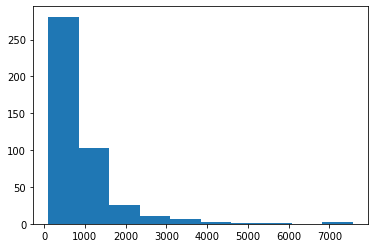

In [ ]:
lendist = [len(s.split()) for s in train_txt]
_ = plt.hist(lendist)
min(lendist), max(lendist), sum(lendist)/len(lendist), sum([l > 512 for l in lendist])/len(lendist)
# What this shows is that most of your texts are rather long.
# Not a problem for traditional models with sparse features,
# but use of tokenizers from bert-like models may make things complicated.

In [ ]:
# I had difficulties understanding how you obtained the tokenizer.
# You seem to have a complex expression bringing both the tokenizer
# and the model itself. We only need the tokenizer.
# So the following only gets a tokenizer from HuggingFace hub.
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
# The few cells below is to show what is happening with the tokenizer.
# This is how to tokenize a single text.
tokenizer(train_txt[0])

Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


{'input_ids': [101, 1726, 8125, 4935, 158, 119, 156, 119, 1105, 1975, 1556, 17171, 1106, 159, 26868, 1204, 1103, 5148, 1573, 1677, 117, 1185, 1141, 1144, 1518, 2374, 1106, 1657, 1113, 1103, 1677, 1334, 1104, 1103, 5907, 117, 1137, 1485, 1157, 26117, 16739, 119, 1726, 3349, 1106, 11407, 1241, 1343, 1148, 1116, 1107, 1141, 2204, 188, 12821, 4184, 1142, 1214, 117, 1114, 1157, 17595, 2315, 1389, 118, 123, 2862, 117, 170, 8823, 1104, 8895, 1200, 117, 1657, 1200, 1105, 187, 5909, 1115, 1156, 4248, 1103, 1583, 112, 188, 1248, 3143, 1106, 1103, 5907, 119, 1109, 2862, 1110, 4533, 1106, 4286, 9961, 1107, 1103, 1148, 1544, 1104, 1142, 1214, 117, 1185, 2206, 1190, 1345, 119, 2098, 4010, 1110, 170, 10085, 1104, 15383, 2473, 1164, 17455, 1829, 1283, 1121, 1103, 1588, 7712, 117, 1187, 6479, 1341, 1103, 2067, 1336, 1129, 125, 3775, 1201, 1385, 117, 1824, 1198, 1170, 1103, 5907, 112, 188, 4994, 5969, 1104, 6161, 2067, 1310, 1106, 4600, 6120, 119, 1109, 1805, 1110, 1126, 1298, 9085, 1156, 1145, 1176, 11

In [ ]:
# We can use the token ids above (with some care),
# but we can also get the actual texts of the tokens.
tok = tokenizer(train_txt[0])
tokenizer.convert_ids_to_tokens(tok.input_ids)

['[CLS]',
 'India',
 'Jo',
 '##ins',
 'U',
 '.',
 'S',
 '.',
 'and',
 'China',
 'With',
 'Plans',
 'to',
 'V',
 '##isi',
 '##t',
 'the',
 'Moon',
 'So',
 'far',
 ',',
 'no',
 'one',
 'has',
 'ever',
 'managed',
 'to',
 'land',
 'on',
 'the',
 'far',
 'side',
 'of',
 'the',
 'moon',
 ',',
 'or',
 'near',
 'its',
 'shadowy',
 'poles',
 '.',
 'India',
 'wants',
 'to',
 'tackle',
 'both',
 'those',
 'first',
 '##s',
 'in',
 'one',
 'fell',
 's',
 '##wo',
 '##op',
 'this',
 'year',
 ',',
 'with',
 'its',
 'Chandra',
 '##ya',
 '##an',
 '-',
 '2',
 'mission',
 ',',
 'a',
 'trio',
 'of',
 'orbit',
 '##er',
 ',',
 'land',
 '##er',
 'and',
 'r',
 '##over',
 'that',
 'would',
 'represent',
 'the',
 'country',
 "'",
 's',
 'second',
 'visit',
 'to',
 'the',
 'moon',
 '.',
 'The',
 'mission',
 'is',
 'scheduled',
 'to',
 'launch',
 'sometime',
 'in',
 'the',
 'first',
 'half',
 'of',
 'this',
 'year',
 ',',
 'no',
 'earlier',
 'than',
 'March',
 '.',
 'Its',
 'target',
 'is',
 'a',
 'patch',
 'of',

In [ ]:
# Now we can do this for real.
# The following is similar to calling the tokenizer,
# but tokenizes all the texts in batch - generally faster.
# It will warn, but we will not use it with BERT, so no worries.
train_tokenized = tokenizer.batch_encode_plus(train_txt, truncation=False, padding=False)

In [ ]:
train_tokens = [tokenizer.convert_ids_to_tokens(x) for x in train_tokenized.input_ids]
# Now we have a list of lists with each member a string token.

(150, 10648, 1219.027713625866, 0.8244803695150116)

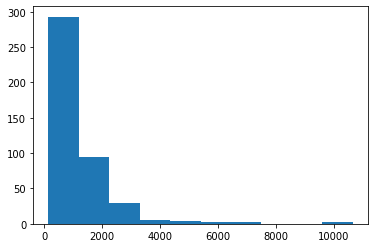

In [ ]:
lendist = [len(x) for x in train_tokens]
_ = plt.hist(lendist)
min(lendist), max(lendist), sum(lendist)/len(lendist), sum([l > 512 for l in lendist])/len(lendist)
# We now have even longer sequences - 80% of the documents would be truncated if we feed them
# to a pretrained model with sequence length of 512 tokens.

In [ ]:
# now, we can vectorize this with sklearn,
# However, we want to skip any tokenization/processing
# by the sklearn tokenizers.
# Note that this only does singl-token features.
# If we want token n-grams, we need to either pre-process our input token list,
# or pass an analyzer that returns n-gram features.
vec = TfidfVectorizer(analyzer=lambda x: x)
train_X = vec.fit_transform(train_tokens)

In [ ]:
# Now we can use any sklearn classifier, or set up a pipleline as you did
# I'll be lazy here.
clf = LogisticRegression()
clf.fit(train_X, train_lab)

LogisticRegression()

In [ ]:
# Now, convert the development set before the same way:
#dev_txt = read_data('FramingDetection/Data/data/en/dev-articles-subtask-1/')
dev_txt = read_data('FramingDetection/Data/data/en/test-articles-subtask-1/')
dev_tokenized = tokenizer.batch_encode_plus(dev_txt, truncation=False, padding=False)
dev_tokens = [tokenizer.convert_ids_to_tokens(x) for x in dev_tokenized.input_ids]
dev_X = vec.transform(dev_tokens)

In [ ]:
pred = clf.predict(dev_X)
pred
# Not great results without further experimentation,
# but conceptually this should be help.

array(['opinion', 'reporting', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion'

In [ ]:
# Bonus: using  subword-token ngrams
# the following function returns n-gram ranges of a given sequence.
def get_ngrams(s, ngmin, ngmax, separator="-", suffix="", flatten=True):
    """ For the given sequence s. Return all ngrams in range ngmin-ngmax.
        spearator is useful for readability
        suffix is an arbitrary string useful for distinguishing
                in case differernt types of ngrams
        if flatten is false, a list of lists is returned where the
                first element contains the ngrams of size ngmin
                and the last contains the ngrams of size ngmax
    """

    # return a single dummy feature if there are no applicable ngrams
    # probably resulting in a mojority-class classifier
    if ngmax == 0 or (ngmax - ngmin < 0) :
        return ['__dummy__']

    ngrams = [[] for x in range(1, ngmax + 1)]
    for i, ch in enumerate(s):
        for ngsize in range(ngmin, ngmax + 1):
            if (i + ngsize) <= len(s):
                ngrams[ngsize - 1].append(
                        separator.join(s[i:i+ngsize]) + suffix)
    if flatten:
        ngrams = [ng for nglist in ngrams for ng in nglist]
    return ngrams
# example usage
get_ngrams(['a', 'b', 'c', 'd'], 1, 3)

['a', 'b', 'c', 'd', 'a-b', 'b-c', 'c-d', 'a-b-c', 'b-c-d']

In [ ]:
# now we can vectorize using this 'analyzer'
# vec = TfidfVectorizer(analyzer=lambda x: get_ngrams(x, 1, 3))
vec = TfidfVectorizer(analyzer=lambda x: get_ngrams(x, 1, 5))
train_X = vec.fit_transform(train_tokens)

In [ ]:
# imports for sklearn:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [20]:
# train the model again - if tuned well,
# this should work better since it has more information.
#parameters = {'C': np.logspace(0.1, 5, num=10)}
#parameters = {'C': np.linspace(0.1, 4, num=50)} # 0.2689 mit 20 und 0.2725 bei 50 mit 1.21 als besten Parameter
# parameters = {'C': np.linspace(1, 2, num=10)} # 1 mit 0.26
# parameters = {'C': np.linspace(0.5, 2, num=20)} # 0.5
# parameters = {'C': np.linspace(-3, 2, num=20)} # 0.68
# parameters = {'C': np.linspace(0.5, 1.5, num=50) # 0.5
parameters = {'C': np.linspace(0.1, 2, num=50)} 
clf = LogisticRegression(C='C', class_weight='balanced', max_iter =100000)
clf_c = GridSearchCV(clf, parameters)
clf_c.fit(train_X, train_lab)
# re-vectorize the devset
dev_X = vec.transform(dev_tokens)
# predict
Y_pred = clf_c.predict(dev_X)

KeyboardInterrupt: ignored

In [ ]:
clf_c.best_params_

{'C': 0.5}

In [ ]:
# convert strings to numbers
train_lab_num = []

for i in train_lab:
  if(i == 'opinion'):
    train_lab_num.append(0) #train_lab['opinion' == 1, 'satire' =2, 'reporting' = 3 for i in train_lab]
  elif(i == 'reporting'):
    train_lab_num.append(1)
  elif(i == 'satire'):
    train_lab_num.append(2)

In [ ]:
from tqdm import tqdm
def make_dataframe(input_folder, labels_folder=None):
    # MAKE TXT DATAFRAME
    text = []

    for fil in tqdm(filter(lambda x: x.endswith('.txt'), os.listdir(input_folder))):
        iD, txt = fil[7:].split('.')[0], open(input_folder + fil, 'r', encoding='utf-8').read()
        text.append((iD, txt))

    df_text = pd.DataFrame(text, columns=['id', 'text']).set_index('id')

    df = df_text

    # MAKE LABEL DATAFRAME
    if labels_folder:
        labels = pd.read_csv(labels_folder, sep='\t', header=None)
        labels = labels.rename(columns={0: 'id', 1: 'type'})
        labels.id = labels.id.apply(str)
        labels = labels.set_index('id')

        # JOIN
        df = labels.join(df_text)[['text', 'type']]

    return df

In [ ]:
#additional import
import pandas as pd

In [ ]:
parameters = {'alpha': np.logspace(-3, 2, num=10), 'gamma': np.logspace(-3, 2, num=10)}

kr = KernelRidge(kernel='laplacian')
clf_kr = GridSearchCV(kr, parameters)
clf_kr = clf_kr.fit(train_X, train_lab_num) # 

# re-vectorize the devset
dev_X = vec.transform(dev_tokens)
# predict
Y_pred = clf_kr.predict(dev_X)

#kr_rbf = KernelRidge(kernel='rbf')
#clf_rbf = GridSearchCV(kr_rbf, parameters)
#Y_pred = clf_rbf.fit(train_X, train_lab_num) # 

#parameters = {'alpha': np.logspace(-2, 3, num=10), 'gamma': np.logspace(-2, 3, num=10)}

#kr_lin = KernelRidge(kernel='linear')
#clf_lin = GridSearchCV(kr_lin, parameters)
#Y_pred = clf_lin.fit(train_X, train_lab_num)

#kr_p = KernelRidge(kernel='polynomial', degree=3)
#clf_p = GridSearchCV(kr_p, parameters)
#Y_pred = clf_p.fit(train_X, train_lab_num)

# convert numbers to string
pred = []

for i in Y_pred:
  if(i == 0):
    pred.append('opinion') #train_lab['opinion' == 1, 'satire' =2, 'reporting' = 3 for i in train_lab]
  elif(i == 1):
    pred.append('reporting')
  elif(i == 2):
    pred.append('satire')

# export
test = make_dataframe('FramingDetection/Data/data/en/dev-articles-subtask-1/')

language = "en"
out_fn = "FramingDetection/Subtask1/results/output-subtask-1-dev-" + language + ".txt"
out = pd.DataFrame(pred, test.index)
out.to_csv(out_fn, sep='\t', header=None)
print('Results on: ', out_fn)

In [ ]:
# export
    
test = make_dataframe('FramingDetection/Data/data/en/dev-articles-subtask-1/')

language = "en"
out_fn = "FramingDetection/Subtask1/results/output-subtask-1-dev-" + language + ".txt"
out = pd.DataFrame(Y_pred, test.index)
out.to_csv(out_fn, sep='\t', header=None)
print('Results on: ', out_fn)

83it [00:00, 16344.00it/s]

Results on:  FramingDetection/Subtask1/results/output-subtask-1-dev-en.txt


In [ ]:
Y_pred

array(['opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'reporting', 'opinion', 'opinion',
       'opinion', 'reporting', 'satire', 'opinion', 'opinion', 'satire',
       'satire', 'opinion', 'opinion', 'satire', 'opinion', 'satire',
       'opinion', 'opinion', 'opinion', 'opinion', 'reporting',
       'reporting', 'satire', 'satire', 'opinion', 'opinion', 'reporting',
       'opinion', 'opinion', 'reporting', 'satire', 'opinion', 'opinion',
       'opinion', 'reporting', 'opinion', 'opinion', 'opinion',
       'reporting', 'reporting', 'satire', 'opinion', 'opinion',
       'opinion', 'reporting', 'satire', 'opinion', 'reporting', 'satire',
       'opinion', 'reporting', 'opinion', 'opinion', 'reporting',
       'reporting', 'satire', 'opinion', 'opinion', 'opinion',
       'reporting', 'opinion', 'satire', 'satire', 'opinion', 'opinion',
       'opinion', 'opinion', 'opinion', 'opinion', 'opinion', 'opinion',
       'reporting

In [ ]:
parameters

{'C': array([0.1       , 0.17959184, 0.25918367, 0.33877551, 0.41836735,
        0.49795918, 0.57755102, 0.65714286, 0.73673469, 0.81632653,
        0.89591837, 0.9755102 , 1.05510204, 1.13469388, 1.21428571,
        1.29387755, 1.37346939, 1.45306122, 1.53265306, 1.6122449 ,
        1.69183673, 1.77142857, 1.85102041, 1.93061224, 2.01020408,
        2.08979592, 2.16938776, 2.24897959, 2.32857143, 2.40816327,
        2.4877551 , 2.56734694, 2.64693878, 2.72653061, 2.80612245,
        2.88571429, 2.96530612, 3.04489796, 3.1244898 , 3.20408163,
        3.28367347, 3.36326531, 3.44285714, 3.52244898, 3.60204082,
        3.68163265, 3.76122449, 3.84081633, 3.92040816, 4.        ])}

In [ ]:
!pip install transformers
!pip install swifter
!git clone https://github.com/cicl-iscl/FramingDetection.git
import pandas as pd
from tqdm import tqdm
import numpy as np
import os
import sys

import torch
import transformers as ppb  # pytorch transformers

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import classification_report as report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings

import swifter

tqdm.pandas()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'FramingDetection' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#try:

warnings.filterwarnings('ignore')
#except Exception as e:
#    pass

def make_dataframe(input_folder, labels_folder=None):
    # MAKE TXT DATAFRAME
    text = []

    for fil in tqdm(filter(lambda x: x.endswith('.txt'), os.listdir(input_folder))):
        iD, txt = fil[7:].split('.')[0], open(input_folder + fil, 'r', encoding='utf-8').read()
        text.append((iD, txt))

    df_text = pd.DataFrame(text, columns=['id', 'text']).set_index('id')

    df = df_text

    # MAKE LABEL DATAFRAME
    if labels_folder:
        labels = pd.read_csv(labels_folder, sep='\t', header=None)
        labels = labels.rename(columns={0: 'id', 1: 'type'})
        labels.id = labels.id.apply(str)
        labels = labels.set_index('id')

        # JOIN
        df = labels.join(df_text)[['text', 'type']]

    return df

class BertTokenizer(object):

    def __init__(self, text=[]):
        self.text = text

        # For DistilBERT:
        self.model_class, self.tokenizer_class, self.pretrained_weights = (
        ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

        # Load pretrained model/tokenizer
        self.tokenizer = self.tokenizer_class.from_pretrained(self.pretrained_weights)

        self.model = self.model_class.from_pretrained(self.pretrained_weights)

    def get(self):

        df = pd.DataFrame(data={"text": self.text})
        tokenized = df["text"].swifter.apply((lambda x: self.tokenizer.encode(x, add_special_tokens=True)))
        #tokenized = [self.tokenizer.encode(x, add_special_tokens=True) for x in self.text]

        max_len = 0
        for i in tokenized.values:
            if len(i) > max_len:
                max_len = len(i)

        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized.values])

        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = torch.tensor(padded)
        attention_mask = torch.tensor(attention_mask)

        with torch.no_grad():
            last_hidden_states = self.model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].numpy()

        return features

def main():
    print("Read Data from disk:")
    #loaddata.load_trainingdata()
    #os.chdir('/Volumes/Elements/Computerlinguistics/Subtask1/')

    language = "en"
    folder_train = "/content/FramingDetection/Data/data/" + language + "/train-articles-subtask-1/"
    folder_dev = "/content/FramingDetection/Data/data/" + language + "/dev-articles-subtask-1/"
    labels_train_fn = "/content/FramingDetection/Data/data/" + language + "/train-labels-subtask-1.txt"
    out_fn = "/content/FramingDetection/Data/results/output-subtask-1-dev-" + language + ".txt"

    # Read Data
    print('Loading training...')
    train = make_dataframe(folder_train, labels_train_fn)
    print('Loading dev...')
    test = make_dataframe(folder_dev)

    X_train = train['text'].values
    X_test = test['text'].values
    Y_train = train['type'].values


    #encoder = LabelEncoder()
    #Y_train = encoder.fit_transform(Y_train)
    #x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

    _instance = BertTokenizer(text=X_train)
    tokens = _instance.get()
    print(tokens[:10])
    sys.exit()

    #lr_clf = LogisticRegression()
    #lr_clf.fit(tokens, Y_train)

    pipe = Pipeline([('vectorizer', CountVectorizer(ngram_range=(10, 10),
                                                     analyzer='char')),
                      ('RandomForestClassifier', DecisionTreeClassifier(class_weight='balanced', max_depth=None,
                                 min_samples_split=2, random_state=0))])

    pipe.fit(tokens, Y_train)

    print('In-sample Acc: \t\t', pipe.score(X_train, Y_train))

    Y_pred = pipe.predict(X_test)

    out = pd.DataFrame(Y_pred, test.index)
    out.to_csv(out_fn, sep='\t', header=None)
    print('Results on: ', out_fn)

    #_instance = BertTokenizer(text=x_test)
    #tokensTest = _instance.get()

    #predicted = lr_clf.predict(tokensTest)

    #np.mean(predicted == y_test)


if __name__ == "__main__":
    main()



Read Data from disk:
Loading training...


433it [00:00, 8487.44it/s]


Loading dev...


83it [00:00, 5255.54it/s]
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Pandas Apply:   0%|          | 0/433 [00:00<?, ?it/s]

# **Subtask 2 - Framing Detection**

In [ ]:
import pandas as pd
from tqdm import tqdm
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import classification_report as report
from sklearn.feature_extraction.text import CountVectorizer
import argparse
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import warnings


In [ ]:
#try

warnings.filterwarnings('ignore')
#except Exception as e:
#    pass

def make_dataframe(input_folder, labels_folder=None):
    #MAKE TXT DATAFRAME
    text = []

    for fil in tqdm(filter(lambda x: x.endswith('.txt'), os.listdir(input_folder))):
        
        iD, txt = fil[7:].split('.')[0], open(input_folder +fil, 'r', encoding='utf-8').read()
        text.append((iD, txt))

    df_text = pd.DataFrame(text, columns=['id','text']).set_index('id')
    df = df_text
    
    
    #MAKE LABEL DATAFRAME
    if labels_folder:
        labels = pd.read_csv(labels_folder, sep='\t', header=None)
        labels = labels.rename(columns={0:'id',1:'frames'})
        labels.id = labels.id.apply(str)
        labels = labels.set_index('id')

        #JOIN
        df = labels.join(df_text)[['text','frames']]
        
    
    return df

def main():
    print("Read Data from disk:")
    language = "en"
    folder_train = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-articles-subtask-2/"
    folder_dev = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/dev-articles-subtask-2/"
    labels_train_fn = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-labels-subtask-2.txt"
    out_fn = "/content/FramingDetection/Data/results/output-subtask-2-dev-" + language + ".txt"    

    print()
    folder_train 
    folder_dev 
    labels_train_fn 
    out_fn 

    #Read Data
    print('Loading training...')
    train = make_dataframe(folder_train, labels_train_fn)
    print('Loading dev...')
    test = make_dataframe(folder_dev)

    X_train = train['text'].values
    X_test = test['text'].values

    encoder = MultiLabelBinarizer() #use sklearn binarizer

    Y_train = train['frames'].str.split(',').values
    Y_train = encoder.fit_transform(Y_train)


    pipe = Pipeline([('vectorizer',CountVectorizer(ngram_range = (1, 2), 
                                               analyzer='word')),
                ('SVM_multiclass', MultiOutputClassifier(svm.SVC(class_weight= None, C=1, kernel='linear'),n_jobs=1))])

    pipe.fit(X_train,Y_train)

    print('In-sample Acc: \t\t', pipe.score(X_train,Y_train))
    
    Y_pred = pipe.predict(X_test)
    out = encoder.inverse_transform(Y_pred)
    out = list(map(lambda x: ','.join(x), out))
    out = pd.DataFrame(out, test.index)
    print("dataframe out: " + out)
    out.to_csv(out_fn, sep='\t', header=None)
    print('Results on: ', out_fn)

if __name__ == "__main__":
    main()

Read Data from disk:

Loading training...


433it [00:01, 420.20it/s]


Loading dev...


83it [00:00, 659.48it/s]


In-sample Acc: 		 0.9953810623556582
                                                           0
id                                                          
813494037  dataframe out: Legality_Constitutionality_and_...
830359136  dataframe out: Legality_Constitutionality_and_...
833050243  dataframe out: Crime_and_punishment,External_r...
813547724  dataframe out: Legality_Constitutionality_and_...
833028680  dataframe out: Crime_and_punishment,External_r...
...                                                      ...
822942601  dataframe out: External_regulation_and_reputat...
832269185  dataframe out: Legality_Constitutionality_and_...
814251296  dataframe out: Legality_Constitutionality_and_...
813992175                            dataframe out: Morality
833053676  dataframe out: Crime_and_punishment,Legality_C...

[83 rows x 1 columns]
Results on:  /content/FramingDetection/Data/results/output-subtask-2-dev-en.txt


In [ ]:

language = "en"
    #folder_train = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-articles-subtask-2/"
    #folder_dev = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/dev-articles-subtask-2/"
    #labels_train_fn = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-labels-subtask-2.txt"
out_fn = "/content/FramingDetection/Data/results/output-subtask-2-dev-" + language + ".txt"    

    #print(
     #   folder_train, 
      #  folder_dev, 
       # labels_train_fn,
        #out_fn) 

parser = argparse.ArgumentParser(description='Subtask-2')
#folder_train = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-articles-subtask-2/"
  
#parser.add_argument('folder_train',  type=str, nargs=1,
#                       help='Path to training articles')
#polder_dev = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/dev-articles-subtask-2/"
#parser.add_argument('polder_dev',  type=str, nargs=1,
#                        help='Path to dev articles')
tabels_train_fn = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-labels-subtask-2.txt"
#parser.add_argument('tabels_train_fn',  type=str, nargs=1,
#                       help='Path to training labels')
out_fn = "/content/FramingDetection/Data/results/output-subtask-2-dev-" + language + ".txt"    
parser.add_argument('-o', "--out_fn",  type=str, nargs=1,
                help='Path to output predictions on dev (mandatory)')
args, unknown = parser.parse_known_args()


usage: [-h] [-o OUT_FN] tabels_train_fn
: error: the following arguments are required: tabels_train_fn


SystemExit: ignored

In [ ]:
import pandas as pd
from tqdm import tqdm
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import classification_report as report
from sklearn.feature_extraction.text import CountVectorizer
import argparse
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import warnings


warnings.filterwarnings('ignore')
#except Exception as e:
#    pass

def make_dataframe(input_folder, labels_folder=None):
    #MAKE TXT DATAFRAME
    text = []

    for fil in tqdm(filter(lambda x: x.endswith('.txt'), os.listdir(input_folder))):
        
        iD, txt = fil[7:].split('.')[0], open(input_folder +fil, 'r', encoding='utf-8').read()
        text.append((iD, txt))

    df_text = pd.DataFrame(text, columns=['id','text']).set_index('id')
    df = df_text
    
    
    #MAKE LABEL DATAFRAME
    if labels_folder:
        labels = pd.read_csv(labels_folder, sep='\t', header=None)
        labels = labels.rename(columns={0:'id',1:'frames'})
        labels.id = labels.id.apply(str)
        labels = labels.set_index('id')

        #JOIN
        df = labels.join(df_text)[['text','frames']]
        
    
    return df

def main():
    print("Read Data from disk:")
    
    language = "en"
    #folder_train = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-articles-subtask-2/"
    #folder_dev = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/dev-articles-subtask-2/"
    #labels_train_fn = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-labels-subtask-2.txt"
    out_fn = "/content/FramingDetection/Data/results/output-subtask-2-dev-" + language + ".txt"    

    #print(
     #   folder_train, 
      #  folder_dev, 
       # labels_train_fn,
        #out_fn) 

    parser = argparse.ArgumentParser(description='Subtask-2')
    folder_train = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-articles-subtask-2/"
  
    parser.add_argument('folder_train',  type=str, nargs=1,
                       help='Path to training articles')
    folder_dev = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/dev-articles-subtask-2/"
    parser.add_argument('folder_dev',  type=str, nargs=1,
                        help='Path to dev articles')
    labels_train_fn = "/content/drive/MyDrive/Colab Notebooks/Data/data/" + language + "/train-labels-subtask-2.txt"
    parser.add_argument('labels_train_fn',  type=str, nargs=1,
                        help='Path to training labels')
    out_fn = "/content/FramingDetection/Data/results/output-subtask-2-dev-" + language + ".txt"    
    parser.add_argument('-o', "--out_fn",  type=str, nargs=1,
                help='Path to output predictions on dev (mandatory)')
    args, unknown = parser.parse_known_args()


    
    #args = parser.parse_args()
    #if not args.output:
     #   print("argument -o is mandatory")
      #  sys.exit(1)
    
    #print(args)
    #folder_train = args.train_folder[0]
    #folder_dev = args.dev_folder[0]
    #labels_train_fn = args.train_labels[0]
    #out_fn = args.output[0]


    #Read Data
    print('Loading training...')
    train = make_dataframe(folder_train, labels_train_fn)
    print('Loading dev...')
    test = make_dataframe(folder_dev)

    X_train = train['text'].values
    X_test = test['text'].values

    encoder = MultiLabelBinarizer() #use sklearn binarizer

    Y_train = train['frames'].str.split(',').values
    Y_train = encoder.fit_transform(Y_train)


    pipe = Pipeline([('vectorizer',CountVectorizer(ngram_range = (1, 2), 
                                               analyzer='word')),
                ('SVM_multiclass', MultiOutputClassifier(svm.SVC(class_weight= None, C=1, kernel='linear'),n_jobs=1))])

    pipe.fit(X_train,Y_train)

    print('In-sample Acc: \t\t', pipe.score(X_train,Y_train))
    
    Y_pred = pipe.predict(X_test)
    out = encoder.inverse_transform(Y_pred)
    out = list(map(lambda x: ','.join(x), out))
    out = pd.DataFrame(out, test.index)
    out.to_csv(out_fn, sep='\t', header=None)
    print('Results on: ', out_fn)

if __name__ == "__main__":
    main()

Read Data from disk:


usage: ipykernel_launcher.py [-h] [-o OUT_FN]
                             folder_train folder_dev labels_train_fn
ipykernel_launcher.py: error: the following arguments are required: folder_dev, labels_train_fn


SystemExit: ignored

In [ ]:
!pip install bert-tensorflow
!pip install bert_repo --upgrade
#import optimization 
#import run_classifier 
#import tokenization 
import tensorflow as tf 
import tensorflow_hub
#from bert_repo import run_classifier_with_tfhub
#import run_classifier_with_tfhub.create_tokenizer_from_hub_module from bert-tensflow
#!wget https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4
Bert_Model_Hub = "https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4"
tokenizer = run_classifier_with_tfhub.create_tokenizer_from_hub_module(Bert_Model_Hub)

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q -U tf-models-official==2.7.0
!pip install -U tfds-nightly
!pip install tensorflow-text

import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
!python -m pip install tensorflow_text
#import tensorflow_text #as text  # A dependency of the preprocessing model
import tensorflow_addons as tfa
from official.nlp import optimization
import numpy as np

tf.get_logger().setLevel('ERROR')

os.environ["TFHUB_MODEL_LOAD_FORMAT"]="UNCOMPRESSED"